
Correlation (Pearson) - Java:
  Test LOC vs. Closed PRs: 0.28, P-value: 0.307

Correlation (Pearson) - JavaScript:
  Test LOC vs. Closed PRs: 0.65, P-value: 0.040

Correlation (Pearson) - Python:
  Test LOC vs. Closed PRs: 0.93, P-value: 0.021

Correlation (Pearson) - PHP:
  Test LOC vs. Closed PRs: 1.00, P-value: 0.000

Correlation (Pearson) - C:
  Test LOC vs. Closed PRs: -0.20, P-value: 0.399

Correlation (Pearson) - C++:
  Test LOC vs. Closed PRs: -0.11, P-value: 0.712

Correlation (Pearson) - Ruby: Insufficient data (less than 2 repositories).


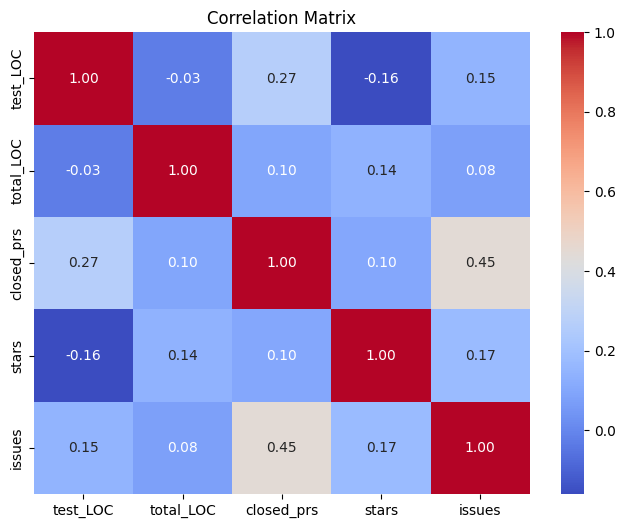


Partial Correlation (Test LOC vs. Closed PRs, controlling for Total LOC):
          n         r         CI95%     p-val
pearson  70  0.269731  [0.04, 0.48]  0.025004


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


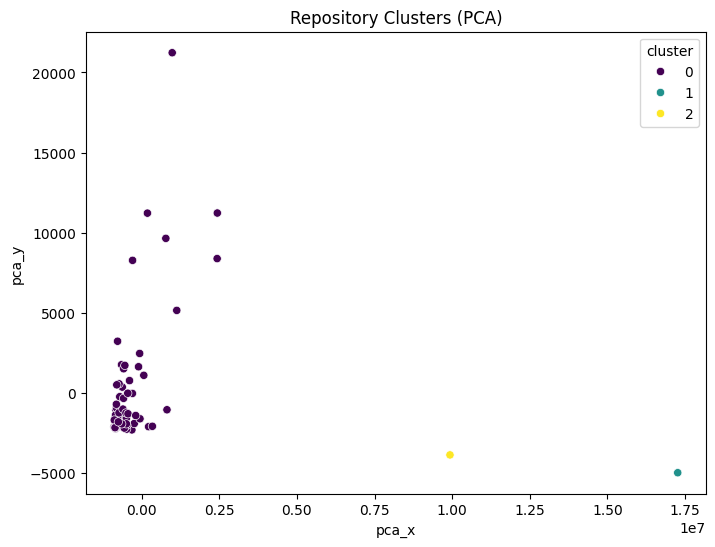


Nearest Neighbors (Top 5) for the First Repository:
5          checkstyle/checkstyle
27                  secdev/scapy
3            pockethub/PocketHub
19           Dogfalo/materialize
36    openresty/lua-nginx-module
Name: repo_name, dtype: object

Detailed Cluster Characteristics:
          test_LOC     total_LOC   closed_prs         stars      issues
cluster                                                                
0        91.264706  4.856139e+05  2552.852941  10736.955882  526.926471
1        59.000000  1.814621e+07   196.000000   3308.000000  304.000000
2         7.000000  1.081468e+07   159.000000  48682.000000  122.000000

Repositories per Cluster:
 cluster
0    68
2     1
1     1
Name: count, dtype: int64

Correlation in Cluster 0:
  Pearson Correlation: 0.261, P-value: 0.032

Correlation in Cluster 2: Insufficient data (less than 2 repositories).

Correlation in Cluster 1: Insufficient data (less than 2 repositories).

Example Repositories for Case Studies:
  Cluster 0:

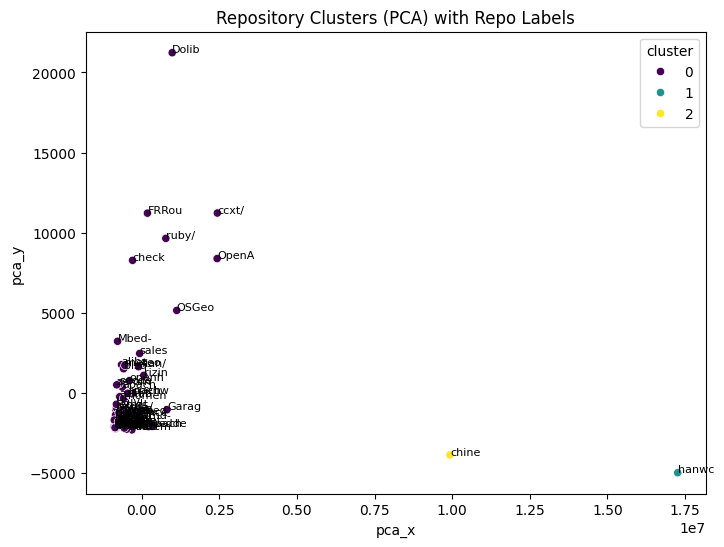


Correlation (Pearson) - Project Size: Medium
  Test LOC vs. Closed PRs: -0.32, P-value: 0.133

Correlation (Pearson) - Project Size: Small
  Test LOC vs. Closed PRs: -0.12, P-value: 0.592

Correlation (Pearson) - Project Size: Large
  Test LOC vs. Closed PRs: 0.68, P-value: 0.000

PHP Data Summary:
         test_LOC    closed_prs
count    5.000000      5.000000
mean   161.400000   5996.000000
std    246.620761  10184.788952
min      8.000000    203.000000
25%     19.000000    214.000000
50%     70.000000    767.000000
75%    114.000000   4927.000000
max    596.000000  23869.000000


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pingouin as pg

try:
    df = pd.read_csv('./updated.csv')
except FileNotFoundError:
    print("Error: CSV file not found. Please provide the correct file path.")
    exit()

numeric_cols = ['stars', 'issues', 'open_prs', 'closed_prs', 'total_prs', 'size_mb', 'total_LOC', 'test_LOC']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

df.dropna(subset=['total_LOC', 'test_LOC', 'closed_prs'], inplace=True)

features = ['total_LOC', 'test_LOC', 'closed_prs']
feature_matrix = df[features].values
similarity_matrix = cosine_similarity(feature_matrix)

# 1. Enhanced Correlation Analysis

# Subgroup Correlations (Programming Language - Example)
if 'language' in df.columns:
    languages = df['language'].unique()
    for lang in languages:
        subset = df[df['language'] == lang]
        if len(subset) > 1:
            pearson_loc_prs = stats.pearsonr(subset['test_LOC'], subset['closed_prs'])
            print(f"\nCorrelation (Pearson) - {lang}:")
            print(f"  Test LOC vs. Closed PRs: {pearson_loc_prs[0]:.2f}, P-value: {pearson_loc_prs[1]:.3f}")
        else:
            print(f"\nCorrelation (Pearson) - {lang}: Insufficient data (less than 2 repositories).")

# Correlation Matrix Visualization
corr_matrix = df[['test_LOC', 'total_LOC', 'closed_prs', 'stars', 'issues']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Partial Correlations
partial_corr = pg.partial_corr(data=df, x='test_LOC', y='closed_prs', covar='total_LOC')
print(f"\nPartial Correlation (Test LOC vs. Closed PRs, controlling for Total LOC):")
print(partial_corr)

# 2. In-Depth Adapted SBTCS

# Clustering (K-means)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(feature_matrix)

# Visualization (PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feature_matrix)
df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='viridis')
plt.title('Repository Clusters (PCA)')
plt.show()

# Nearest Neighbors (Example for the first repository)
first_repo_similarity = similarity_matrix[0]
nearest_neighbors_indices = np.argsort(first_repo_similarity)[::-1][1:6]
if 'repo_name' in df.columns:
    print("\nNearest Neighbors (Top 5) for the First Repository:")
    print(df.iloc[nearest_neighbors_indices]['repo_name'])
else:
    print("\nNearest Neighbors (Top 5) for the First Repository: repo_name column not found")

# 3. Integration and Interpretation (Example - Cluster Analysis)
print("\nDetailed Cluster Characteristics:")
cluster_means = df.groupby('cluster')[['test_LOC', 'total_LOC', 'closed_prs', 'stars', 'issues']].mean()
print(cluster_means)
cluster_counts = df['cluster'].value_counts()
print("\nRepositories per Cluster:\n",cluster_counts)

# Correlation within each cluster.
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    if len(cluster_data) > 1:
        correlation = stats.pearsonr(cluster_data['test_LOC'], cluster_data['closed_prs'])
        print(f"\nCorrelation in Cluster {cluster_id}:")
        print(f"  Pearson Correlation: {correlation[0]:.3f}, P-value: {correlation[1]:.3f}")
    else:
        print(f"\nCorrelation in Cluster {cluster_id}: Insufficient data (less than 2 repositories).")

# 4. Case Study Selection (Example: Select repositories from different clusters)
cluster_0_example = df[df['cluster'] == 0].iloc[0]['repo_name'] if not df[df['cluster'] == 0].empty and 'repo_name' in df.columns else "Cluster 0 is empty or repo_name missing"
cluster_1_example = df[df['cluster'] == 1].iloc[0]['repo_name'] if not df[df['cluster'] == 1].empty and 'repo_name' in df.columns else "Cluster 1 is empty or repo_name missing"
cluster_2_example = df[df['cluster'] == 2].iloc[0]['repo_name'] if not df[df['cluster'] == 2].empty and 'repo_name' in df.columns else "Cluster 2 is empty or repo_name missing"

print("\nExample Repositories for Case Studies:")
print(f"  Cluster 0: {cluster_0_example}")
print(f"  Cluster 1: {cluster_1_example}")
print(f"  Cluster 2: {cluster_2_example}")

# 5. Visualization Refinement (Cluster Scatter Plot with Labels)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='viridis')
if 'repo_name' in df.columns:
    for i, row in df.iterrows():
        plt.text(row['pca_x'], row['pca_y'], row['repo_name'][:5], fontsize=8)
plt.title('Repository Clusters (PCA) with Repo Labels')
plt.show()

# 6. Additional Subgroup Analysis (Project Size - Example)
df['project_size'] = pd.qcut(df['total_LOC'], q=3, labels=['Small', 'Medium', 'Large'])
project_sizes = df['project_size'].unique()
for size in project_sizes:
    subset = df[df['project_size'] == size]
    if len(subset) > 1:
        pearson_loc_prs = stats.pearsonr(subset['test_LOC'], subset['closed_prs'])
        print(f"\nCorrelation (Pearson) - Project Size: {size}")
        print(f"  Test LOC vs. Closed PRs: {pearson_loc_prs[0]:.2f}, P-value: {pearson_loc_prs[1]:.3f}")
    else:
        print(f"\nCorrelation (Pearson) - Project Size: {size}: Insufficient data (less than 2 repositories).")

# 7. Investigate PHP Anomaly
php_df = df[df['language'] == 'PHP']
print("\nPHP Data Summary:")
print(php_df[['test_LOC', 'closed_prs']].describe())